In [1]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('../../Dataset/Palladium.csv')
df.shape

(1687, 5)

In [3]:
# Kiểm tra cột close có hàng nào null không
df['Close'].isnull().sum()

0

In [4]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])

# Sắp xếp lại index
df = df.sort_index(ascending=True)
df = df.drop(columns=['Open', 'High', 'Low'])
df

,Close
Date,
2019-03-01,1551.5
2019-03-03,1549.5
2019-03-04,1535.5
2019-03-05,1514.5
2019-03-06,1535.0
...,...
2024-03-22,992.5
2024-03-23,992.5
2024-03-24,984.0


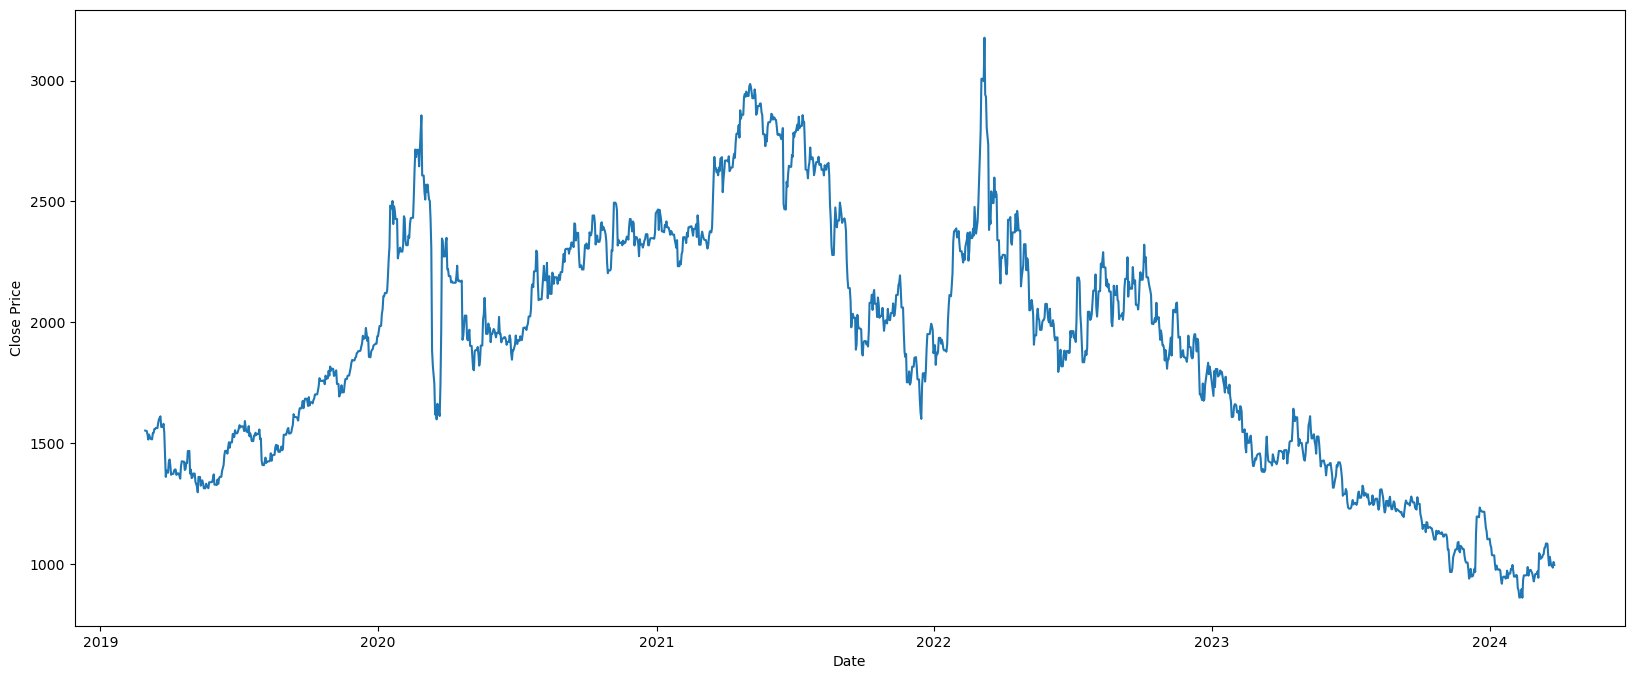

In [5]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [6]:
# Chia train test theo tỉ lệ
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [7]:
# Chia các tập x,y train, test tương ứng
x_train = np.array(train_data.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(train_data['Close']) #Lấy dữ liệu giá Close

x_test = np.array(test_data.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(test_data['Close']) #Lấy dữ liệu giá Close

In [8]:
# Quá trình training
# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12627.888, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12635.816, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12630.732, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12631.380, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12633.963, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12626.534, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12630.164, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12630.992, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12628.008, Time=1.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12631.535, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12626.092, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12630.243, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12627.931, Time=0.96 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=12631.659, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# Tóm tắt model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1180
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -6308.107
Date:                Thu, 30 May 2024   AIC                          12624.214
Time:                        16:32:02   BIC                          12644.504
Sample:                             0   HQIC                         12631.864
                               - 1180                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8297      0.054    -15.336      0.000      -0.936      -0.724
ar.L2          0.1059      0.020      5.189      0.000       0.066       0.146
ma.L1          0.9111      0.053     17.247      0.000       0.808       1.015
sigma2      2598.5481     49.560     52.432      0.000    2501.412    2695.684
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5859.26
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# Quá trình testing 
y_pred = model.predict(n_periods=len(x_test))

In [11]:
# Tính MSE - Mean Squared Error - Sai số bình phương trung bình
test_mse = mean_squared_error(y_test, y_pred) 
print('Testing MSE:', test_mse)

# Tính RMSE - Root Mean Squared Error - Sai số bình phương trung bình
test_rmse = math.sqrt(test_mse)
print('Testing RMSE:', test_rmse)

# Tính MAPE - Mean Absolute Percentage Error - Tỷ lệ phần trăm sai số tuyệt đối trung bình
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)

Testing MSE: 840532.2587754019
Testing RMSE: 916.8054639755381
Testing MAPE: 0.7134184507973512


Giá Close dự đoán:
[2227.85721297 2232.54890699 2228.7470646  2232.39845389 2228.9661646
 2232.20072971 2229.15342587 2232.02441396 2229.31955179 2231.86790202
 2229.4670076  2231.7289785  2229.59789256 2231.60566697 2229.71406888
 2231.49621298 2229.81718951 2231.39905924 2229.90872162 2231.31282348
 2229.98996749 2231.23627875 2230.0620831  2231.16833599 2230.12609447
 2231.10802852 2230.18291236 2231.05449831 2230.23334514 2231.00698373]


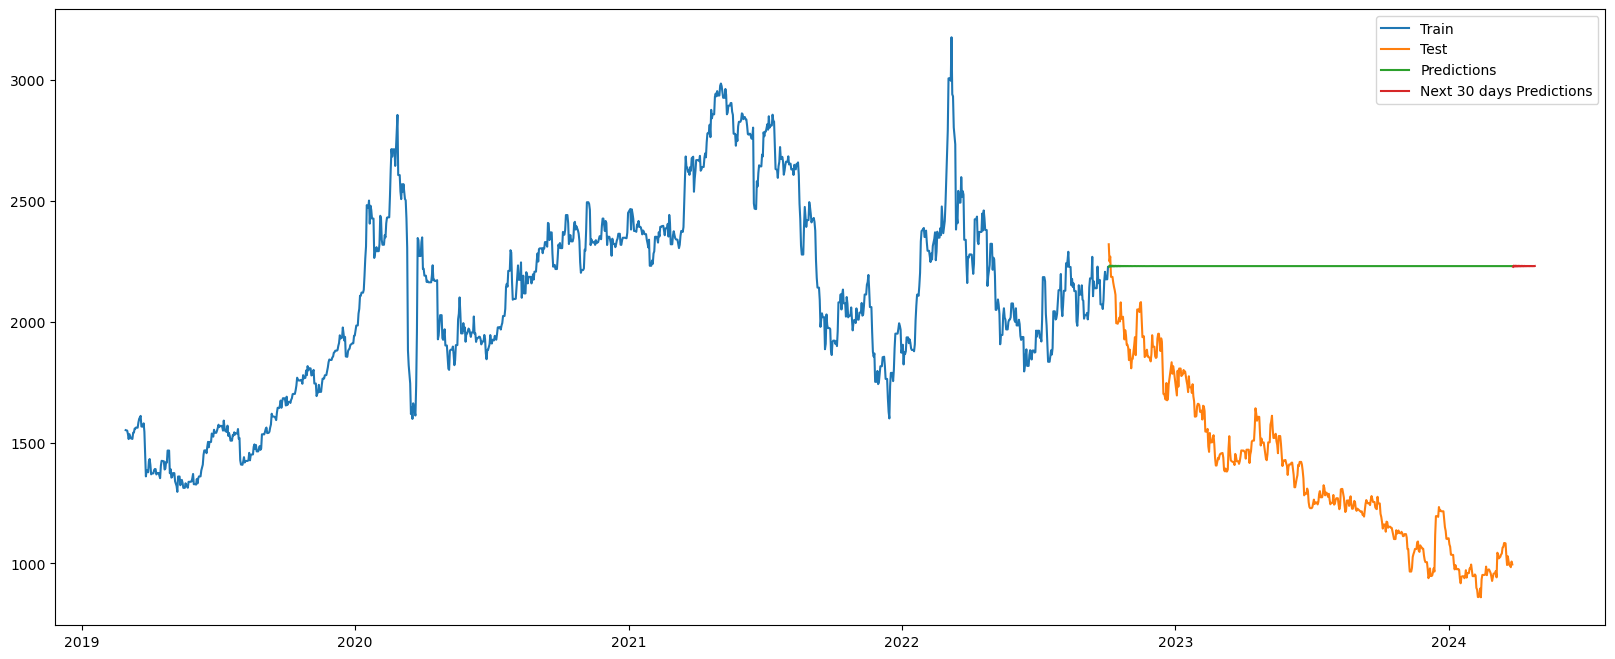

In [12]:
# Dự đoán 30 ngày
predict_days = 30

# Quá trình tạo index predict
date_range = pd.date_range(start = df.index[-1] + pd.DateOffset(days=1), end= df.index[-1] + pd.DateOffset(days=predict_days))

# Chuyển đổi sang NumPy array và reshape
x_next = np.array(date_range).reshape(-1, 1)

# Tạo ra mảng dữ liệu dự đoán của y_next
y_next = model.predict(n_periods=len(x_next))

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_next)

# Vẽ hình
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.plot(x_next, y_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 30 days Predictions'])
plt.show()

Giá Close dự đoán:
[2227.85721297 2232.54890699 2228.7470646  2232.39845389 2228.9661646
 2232.20072971 2229.15342587 2232.02441396 2229.31955179 2231.86790202
 2229.4670076  2231.7289785  2229.59789256 2231.60566697 2229.71406888
 2231.49621298 2229.81718951 2231.39905924 2229.90872162 2231.31282348
 2229.98996749 2231.23627875 2230.0620831  2231.16833599 2230.12609447
 2231.10802852 2230.18291236 2231.05449831 2230.23334514 2231.00698373
 2230.27811037 2230.96480875 2230.31784497 2230.92737333 2230.35311425
 2230.89414484 2230.38442003 2230.86465052 2230.41220772 2230.83847071
 2230.43687268 2230.81523295 2230.45876583 2230.79460661 2230.47819866
 2230.77629822 2230.49544767 2230.7600473  2230.51075826 2230.74562263
 2230.52434827 2230.73281898 2230.53641106 2230.72145418 2230.54711826
 2230.71136654 2230.55662219 2230.70241253 2230.56505809 2230.69446476]


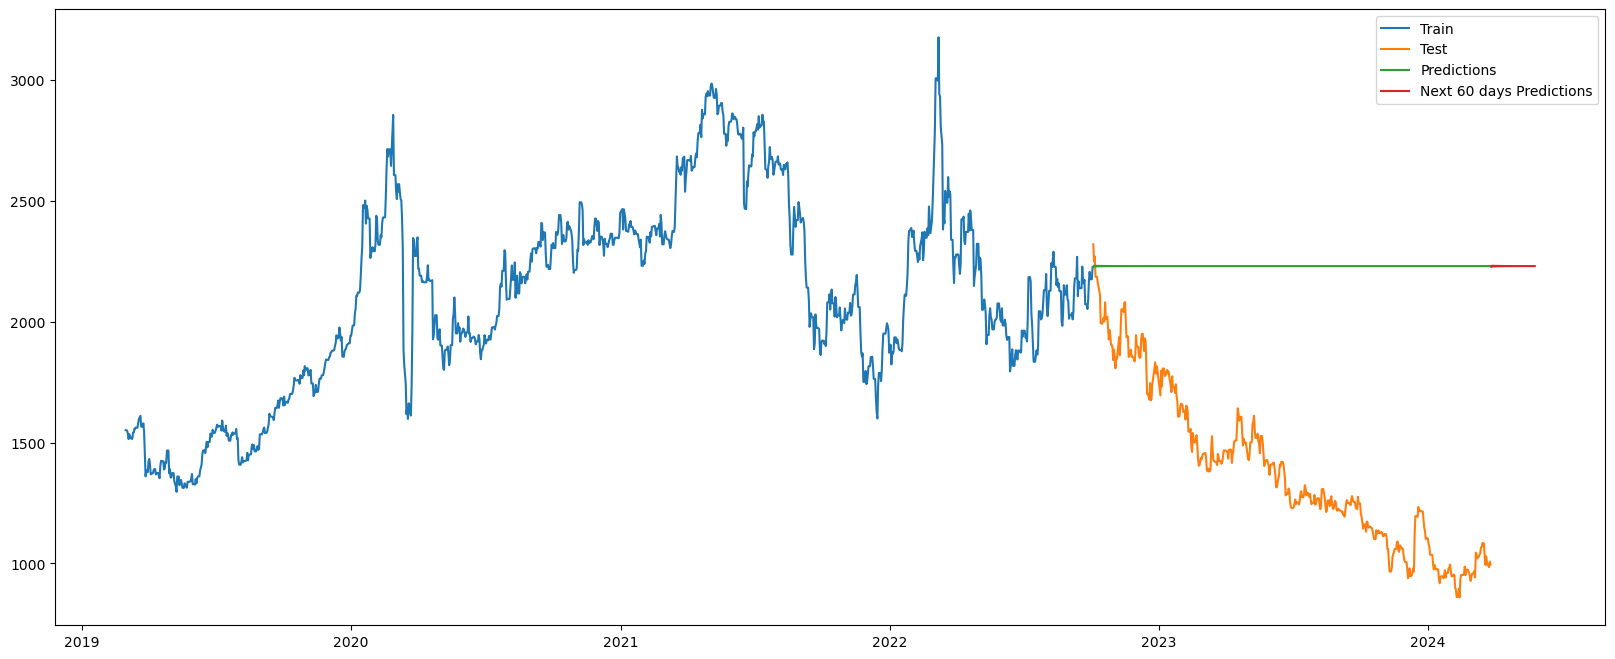

In [13]:
# Dự đoán 60 ngày
predict_days = 60

# Quá trình tạo index predict
date_range = pd.date_range(start = df.index[-1] + pd.DateOffset(days=1), end= df.index[-1] + pd.DateOffset(days=predict_days))

# Chuyển đổi sang NumPy array và reshape
x_next = np.array(date_range).reshape(-1, 1)

# Tạo ra mảng dữ liệu dự đoán của y_next
y_next = model.predict(n_periods=len(x_next))

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_next)

# Vẽ hình
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.plot(x_next, y_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 60 days Predictions'])
plt.show()

Giá Close dự đoán:
[2227.85721297 2232.54890699 2228.7470646  2232.39845389 2228.9661646
 2232.20072971 2229.15342587 2232.02441396 2229.31955179 2231.86790202
 2229.4670076  2231.7289785  2229.59789256 2231.60566697 2229.71406888
 2231.49621298 2229.81718951 2231.39905924 2229.90872162 2231.31282348
 2229.98996749 2231.23627875 2230.0620831  2231.16833599 2230.12609447
 2231.10802852 2230.18291236 2231.05449831 2230.23334514 2231.00698373
 2230.27811037 2230.96480875 2230.31784497 2230.92737333 2230.35311425
 2230.89414484 2230.38442003 2230.86465052 2230.41220772 2230.83847071
 2230.43687268 2230.81523295 2230.45876583 2230.79460661 2230.47819866
 2230.77629822 2230.49544767 2230.7600473  2230.51075826 2230.74562263
 2230.52434827 2230.73281898 2230.53641106 2230.72145418 2230.54711826
 2230.71136654 2230.55662219 2230.70241253 2230.56505809 2230.69446476
 2230.57254598 2230.68741014 2230.5791924  2230.68114831 2230.58509189
 2230.67559018 2230.59032842 2230.67065666 2230.59497647 22

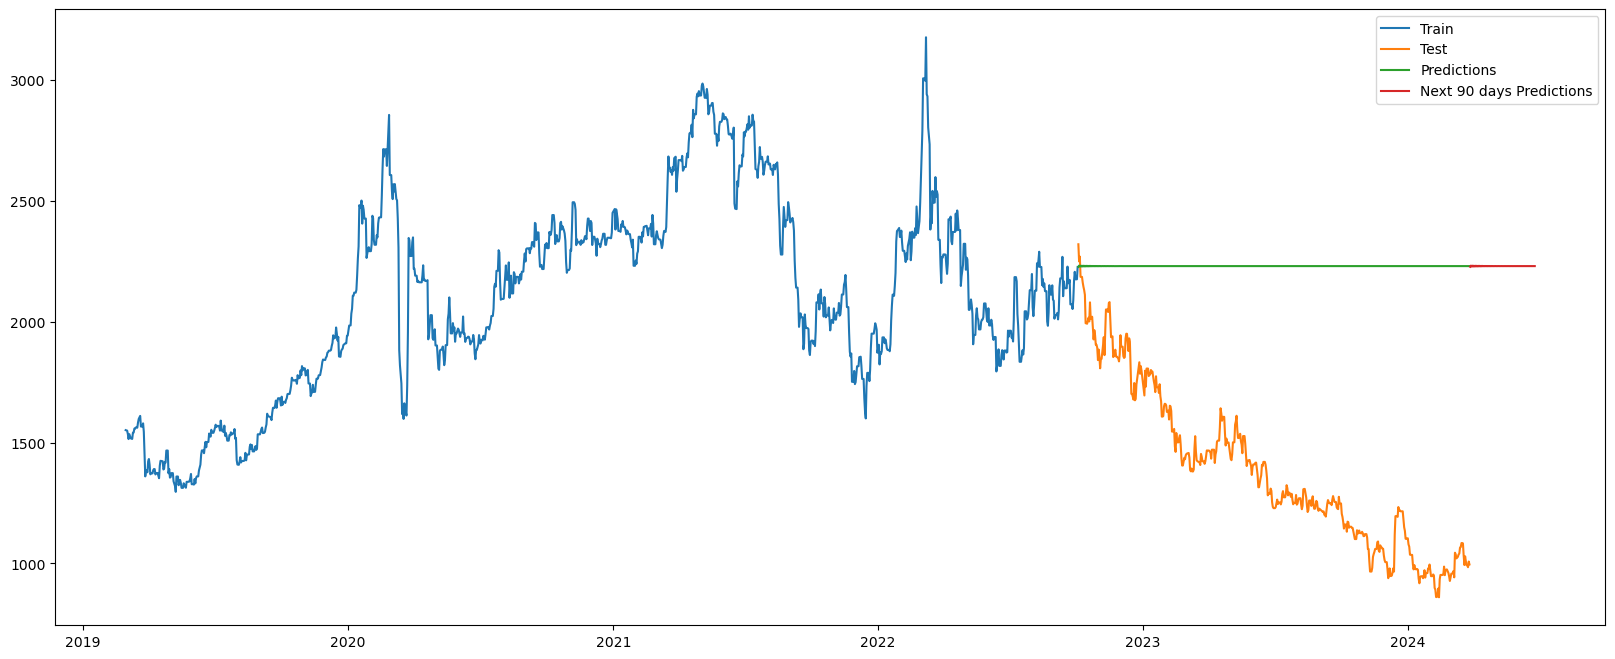

In [14]:
# Dự đoán 90 ngày
predict_days = 90

# Quá trình tạo index predict
date_range = pd.date_range(start = df.index[-1] + pd.DateOffset(days=1), end= df.index[-1] + pd.DateOffset(days=predict_days))

# Chuyển đổi sang NumPy array và reshape
x_next = np.array(date_range).reshape(-1, 1)

# Tạo ra mảng dữ liệu dự đoán của y_next
y_next = model.predict(n_periods=len(x_next))

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_next)

# Vẽ hình
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.plot(x_next, y_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions'])
plt.show()